# PyRAMSES startup system

Please check https://pyramses.paristidou.info/ for the documentation.

In [1]:
import pyramses
import os

Prepare the case study (check https://pyramses.paristidou.info/interface/case.html):

In [2]:
case = pyramses.cfg()
case.addOut('output.trace') # save the simulation output
case.addData('dyn_A.dat') # Dynamic data
case.addData('volt_rat_A.dat') # power-flow data
case.addData('settings1.dat') # solver settings
case.addInit('init.trace') # save initialization procedure
case.addDst('trip_gen.dst') # description of disturbance
case.addCont('cont.trace') # save continuous trace
case.addDisc('disc.trace') # save discrete trace
case.addObs('obs.dat')
case.addTrj('output.trj')

0

Start the simulator

In [3]:
ram = pyramses.sim()

/opt/tljh/user/lib/python3.7/site-packages/pyramses/libs/ramses.so: undefined symbol: c_load_MDL
/opt/tljh/user/lib/python3.7/site-packages/pyramses/libs/ramses.so: undefined symbol: c_unload_MDL
/opt/tljh/user/lib/python3.7/site-packages/pyramses/libs/ramses.so: undefined symbol: c_get_MDL_no
/opt/tljh/user/lib/python3.7/site-packages/pyramses/libs/ramses.so: undefined symbol: c_get_MDL_names


In [15]:
for item in os.listdir('.'):
    if item.endswith(('.trace', '.trj')):
        os.remove(os.path.join('.', item))

Run the simulation (check https://pyramses.paristidou.info/interface/simul.html):

In [5]:
try:
    ram.execSim(case)
except:
    print(ram.getLastErr())   

In [6]:
print(open(case.getOut()).read())


8888888b.         d8888 888b     d888  .d8888b.  8888888888 .d8888b.  
888   Y88b       d88888 8888b   d8888 d88P  Y88b 888       d88P  Y88b 
888    888      d88P888 88888b.d88888 Y88b.      888       Y88b.      
888   d88P     d88P 888 888Y88888P888  "Y888b.   8888888    "Y888b.   
8888888P"     d88P  888 888 Y888P 888     "Y88b. 888           "Y88b. 
888 T88b     d88P   888 888  Y8P  888       "888 888             "888 
888  T88b   d8888888888 888   "   888 Y88b  d88P 888       Y88b  d88P 
888   T88b d88P     888 888       888  "Y8888P"  8888888888 "Y8888P" 

RApid Multithreaded Simulation of Electric power Systems
Version:  3.40 (Full Version)

(c) University of Liege, Belgium
Execution time: 15:47 03/03/2021



SOLVER SETTINGS :
   Using fully decomposed Scheme
   Updating Jacobian only locally, whenever possible
   Skipping Newton solution of converged components
   Using COI reference frame
   Variation of x in Jacobian computation : max( 0.1000E-04 |x|, 0.1000E-04)
   Tolerance

Get the results and plot the voltage evolution (check https://pyramses.paristidou.info/interface/extractor.html):

In [7]:
ext = pyramses.extractor(case.getTrj())

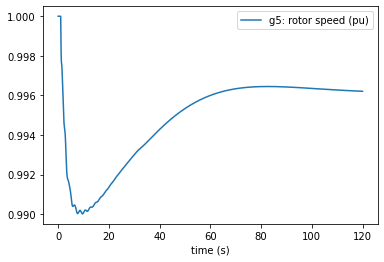

In [8]:
ext.getSync('g5').S.plot()

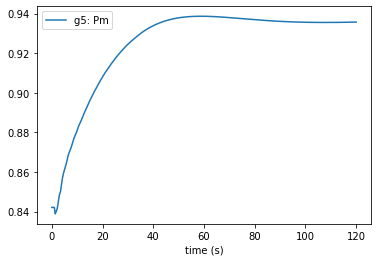

In [9]:
ext.getTor('g5').Pm.plot()

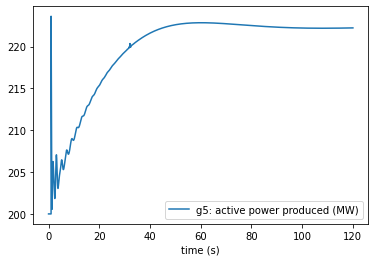

In [10]:
ext.getSync('g5').P.plot()

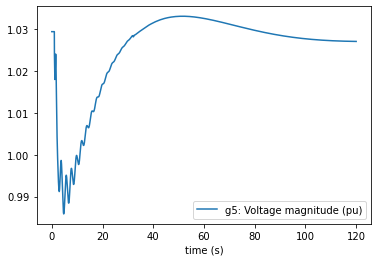

In [11]:
ext.getBus('g5').mag.plot()

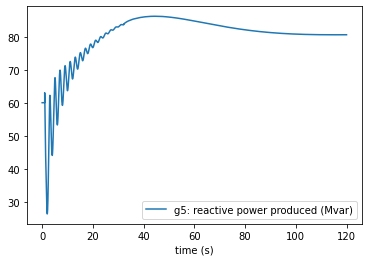

In [12]:
ext.getSync('g5').Q.plot()

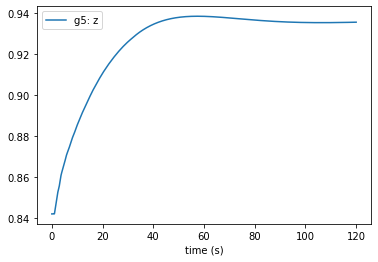

In [13]:
ext.getTor('g5').z.plot()

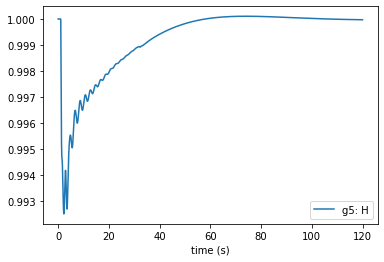

In [14]:
ext.getTor('g5').H.plot()